En este programita vamos a ver la posicion de los cumulos globulares en coordenadas ecuatoriales y galacticas (Harris 1996).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


En el dataset modificado usamos la coma para separar columnas, y a las coordenadas ecuatoriales se las separó en tres columnas, rag para horas, ram para minutos y asi con la right ascention, y con la declination respectivamente. Obtenemos seis columnas para estas coordenadas, mientas que para l y b solo tenemos dos columnas.

In [2]:
datos=pd.read_csv("data.dat",usecols=['rag','ram','ras','deg','dem','des','L','B']) 
datos.head() #verificamos que todo esté en orden.

,rag,ram,ras,deg,dem,des,L,B
0,0,24,5.67,-72,-4,-52.6,305.89,-44.89
1,0,52,45.24,-26,-34,-57.4,152.30,-89.38
2,1,3,14.26,-70,-50,-55.6,301.53,-46.25
3,2,2,57.00,-3,-15,-10.0,161.22,60.76
4,3,12,16.21,-55,-12,-58.4,270.54,52.12


In [3]:
datos.describe() #Esto no nos sirve a nosotros en estos momentos, pero no está demás hacer esto.
datos.dtypes

rag      int64
ram      int64
ras    float64
deg      int64
dem      int64
des    float64
L      float64
B      float64
dtype: object

/home/mauriljb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


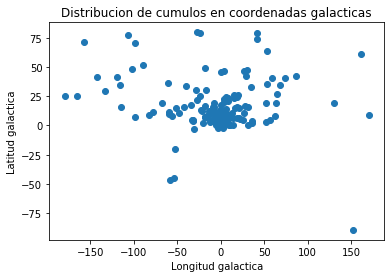

In [4]:
for i in datos.index:
    if datos.L[i]>180:
        datos.L[i]=datos.L[i]-360

        
plt.scatter(datos.L,datos.B,) #Gráfico en coordenadas galacticas. Podemos ver cómo los cúmulos se agrupan en el
plt.title("Distribucion de cumulos en coordenadas galacticas") #origen, es decir cerca del centro de la galaxia.
plt.ylabel("Latitud galactica") #Tambien es notable la poca cantidad de cumulos en valores negativos de B.
plt.xlabel("Longitud galactica")
plt.show();

In [5]:
RA=[]   #Aquí creamos listas para RA y DEC, y las llenamos con los datos de las seis columnas del dataframe
DEC=[]  
for i in datos.index:
    x=(datos["rag"][i]*3600+datos["ram"][i]*60+datos["ras"][i])/3600
    y=(datos["deg"][i]*3600+datos["dem"][i]*60+datos["des"][i])/3600
    RA.append(x)
    DEC.append(y)
ec=pd.DataFrame({"RA":RA,
                "DEC":DEC})

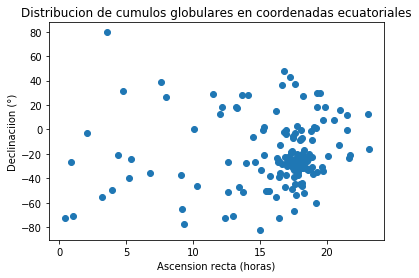

In [6]:
plt.scatter(ec.RA,ec.DEC)
plt.title("Distribucion de cumulos globulares en coordenadas ecuatoriales")
plt.ylabel("Declinaciion (°)")
plt.xlabel("Ascension recta (horas)");

In [7]:
salchicha=pd.read_csv("data.dat",index_col=['Name']) #Por último buscamos a los cúmulos que provienen de la 
ngc1851=salchicha.loc["NGC_1851"]                    #famosa salchicha cósmica, y vemos sus datos completos
ngc2298=salchicha.loc["NGC_2298"]                    #RA, DEC, L, B y tambien distancia al sol, distancia al
ngc5286=salchicha.loc["NGC_5286"]                    #centro galactico, y valores cartesianos de l y b.
m2=salchicha.loc["NGC_7089"]
m56=salchicha.loc["NGC_6779"]
m75=salchicha.loc["NGC_6864"]
m79=salchicha.loc["NGC_1904"]
sc=pd.DataFrame(columns=['rag','ram','ras','deg','dem','des','L','B'])
sc.loc[1]=ngc1851
sc.loc[2]=ngc2298
sc.loc[3]=ngc5286
sc.loc[4]=m2
sc.loc[5]=m56
sc.loc[6]=m75
sc.loc[7]=m79

for i in sc.index:
    if sc.L[i]>180:
        sc.L[i]=sc.L[i]-360

sc.head()

,rag,ram,ras,deg,dem,des,L,B
1,5.0,14.0,6.76,-40.0,-2.0,-47.6,-115.49,35.03
2,6.0,48.0,59.41,-36.0,0.0,-19.1,-114.37,16.00
3,13.0,46.0,26.81,-51.0,-22.0,-27.3,-48.39,10.57
4,21.0,33.0,27.02,0.0,-49.0,-23.7,53.37,35.77
5,19.0,16.0,35.57,30.0,11.0,0.5,62.66,8.34


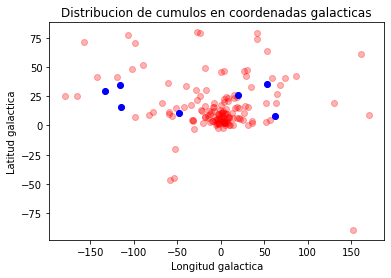

In [8]:
plt.scatter(datos.L,datos.B,color='red',alpha=0.3) #Gráfico en coordenadas galacticas. Podemos ver cómo los cúmulos se agrupan en el
plt.title("Distribucion de cumulos en coordenadas galacticas") #origen, es decir cerca del centro de la galaxia.
plt.ylabel("Latitud galactica") #Tambien es notable la poca cantidad de cumulos en valores negativos de B.
plt.xlabel("Longitud galactica")
plt.scatter(sc.L,sc.B,color='blue')
plt.show();

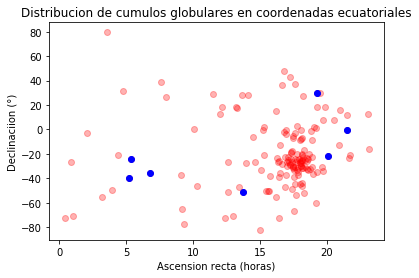

In [9]:
sRA=[]   #Aquí creamos listas para RA y DEC, y las llenamos con los datos de las seis columnas del dataframe
sDEC=[]  
for i in sc.index:
    x=(sc["rag"][i]*3600+sc["ram"][i]*60+sc["ras"][i])/3600
    y=(sc["deg"][i]*3600+sc["dem"][i]*60+sc["des"][i])/3600
    sRA.append(x)
    sDEC.append(y)
sec=pd.DataFrame({"RA":sRA,
                "DEC":sDEC})
plt.scatter(ec.RA,ec.DEC,color='red',alpha=0.3)
plt.title("Distribucion de cumulos globulares en coordenadas ecuatoriales")
plt.ylabel("Declinaciion (°)")
plt.xlabel("Ascension recta (horas)")
plt.scatter(sec.RA,sec.DEC,color='blue')
plt.show();

Referencia:

Harris, W.E. 1996, AJ, 112, 1487